# Ensemble Learning with Traditional ML Models

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import f1_score
import optuna

In [90]:
X_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_train.npy")
X_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_valid.npy")
y_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_train.npy")
y_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_valid.npy")
X_test = np.load("data/Regular_Processed/Without_Ordinal_Encoding/X_test.npy")

for arr in [X_train, X_valid, y_train, y_valid, X_test]:
    print(arr.shape)

(988, 66)
(247, 66)
(988,)
(247,)
(824, 66)


# Loading Traditional ML Models

### Random Forest

In [91]:
# Lazy Predict's Random Forest Classifier values
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=23, random_state=123, criterion='entropy', n_estimators=28)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 1.0
Valid F1 Score: 0.728744939271255


In [92]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_criterion = trial.suggest_categorical('rf_criterion', ['gini', 'entropy', 'log_loss'])
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 7, log=True)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 2, 50, log=True)
    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, random_state=123, criterion=rf_criterion)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score  # - abs((train_f1_score - valid_f1_score)/7)

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-04-14 16:42:24,457] A new study created in memory with name: no-name-c787de12-4a13-4a06-bd57-57a19b5aed51
[I 2024-04-14 16:42:24,517] Trial 0 finished with value: 0.6639676113360324 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 4, 'rf_n_estimators': 20}. Best is trial 0 with value: 0.6639676113360324.
[I 2024-04-14 16:42:24,533] Trial 1 finished with value: 0.5222672064777328 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 2, 'rf_n_estimators': 2}. Best is trial 0 with value: 0.6639676113360324.
[I 2024-04-14 16:42:24,554] Trial 2 finished with value: 0.659919028340081 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 3, 'rf_n_estimators': 5}. Best is trial 0 with value: 0.6639676113360324.
[I 2024-04-14 16:42:24,587] Trial 3 finished with value: 0.6720647773279352 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 5, 'rf_n_estimators': 10}. Best is trial 3 with value: 0.6720647773279352.
[I 2024-04-14 16:42:24,663] Trial 4 finished 

In [93]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.7206477732793523]
HyperParameters = {'rf_criterion': 'gini', 'rf_max_depth': 5, 'rf_n_estimators': 4}


In [94]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=123, criterion='gini', n_estimators=4)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7267206477732794
Valid F1 Score: 0.7206477732793523


### Bernoulli Naive Bayes

In [95]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)
train_preds = naive_bayes_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = naive_bayes_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6973684210526315
Valid F1 Score: 0.6680161943319838


### Nearest Centroid

In [96]:
from sklearn.neighbors import NearestCentroid

nearest_centroid_classifier = NearestCentroid(metric='correlation')
nearest_centroid_classifier.fit(X_train, y_train)
train_preds = nearest_centroid_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = nearest_centroid_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6589068825910931
Valid F1 Score: 0.6720647773279352


c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


In [97]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_metric = trial.suggest_categorical('rf_metric', ['hamming', 'cosine', 'euclidean', 'yule', 'russellrao', 'jaccard', 'chebyshev',
                                                        'sokalmichener', 'sqeuclidean', 'matching', 'rogerstanimoto', 'nan_euclidean',
                                                        'dice', 'sokalsneath', 'correlation', 'canberra', 'manhattan', 'braycurtis'])
    classifier_obj = NearestCentroid(metric=rf_metric)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-04-14 16:42:29,533] A new study created in memory with name: no-name-b79e33a5-b064-478b-9528-8bc6c9e1c506
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWa

In [98]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.6720647773279352]
HyperParameters = {'rf_metric': 'correlation'}


## XGBoost

In [99]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Create XGBoost classifier instance
bst = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='multi:softmax', num_class=3, random_state=123)

# Train the XGBoost model
bst.fit(X_train, y_train)

train_preds = bst.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = bst.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")


Train F1 Score: 0.9969635627530364
Valid F1 Score: 0.7004048582995951


In [100]:
import xgboost as xgb
from sklearn.model_selection import KFold
import optuna

def objective(trial):
    # Define XGBoost parameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }
    
    # Create XGBoost classifier instance with the specified parameters
    bst = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=123, **params)
    
    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    f1_scores = []
    
    for train_idx, valid_idx in kf.split(X_train):
        X_train_fold, X_valid_fold = X_train[train_idx], X_train[valid_idx]
        y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]
        
        bst.fit(X_train_fold, y_train_fold)
        valid_preds = bst.predict(X_valid_fold)
        f1_scores.append(f1_score(y_valid_fold, valid_preds, average='micro'))
    
    # Compute the average F1 score across all folds
    avg_f1_score = sum(f1_scores) / len(f1_scores)
    
    return avg_f1_score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best trial
best_trial = study.best_trial
print(f'Best Trial - F1 Score: {best_trial.value:.4f}')
print(f'Best Hyperparameters: {best_trial.params}')


[I 2024-04-14 16:42:30,706] A new study created in memory with name: no-name-3eda75a5-5867-43e0-9658-6ec3caef521f
C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\1293846748.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-14 16:42:31,850] Trial 0 finished with value: 0.6760806029841563 and parameters: {'n_estimators': 61, 'max_depth': 9, 'learning_rate': 0.03870027298659689}. Best is trial 0 with value: 0.6760806029841563.
C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\1293846748.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_ra

Best Trial - F1 Score: 0.7115
Best Hyperparameters: {'n_estimators': 74, 'max_depth': 4, 'learning_rate': 0.3517770423714702}


In [101]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Create XGBoost classifier instance
bst = xgb.XGBClassifier(n_estimators=117, max_depth=4, learning_rate=0.25993, objective='multi:softmax', num_class=3, random_state=123)

# Train the XGBoost model
bst.fit(X_train, y_train)

train_preds = bst.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = bst.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")


Train F1 Score: 0.9959514170040485
Valid F1 Score: 0.7327935222672065


# Ensemble Learning

In [102]:
estimator_dict = {
    'random_forest': random_forest_classifier,
    'nearest_centroid': nearest_centroid_classifier,
    'bernoulli_naive_bayes': naive_bayes_classifier,
    'XGBoost': bst
}
estimators = list(estimator_dict.items())

### Analysis of Models

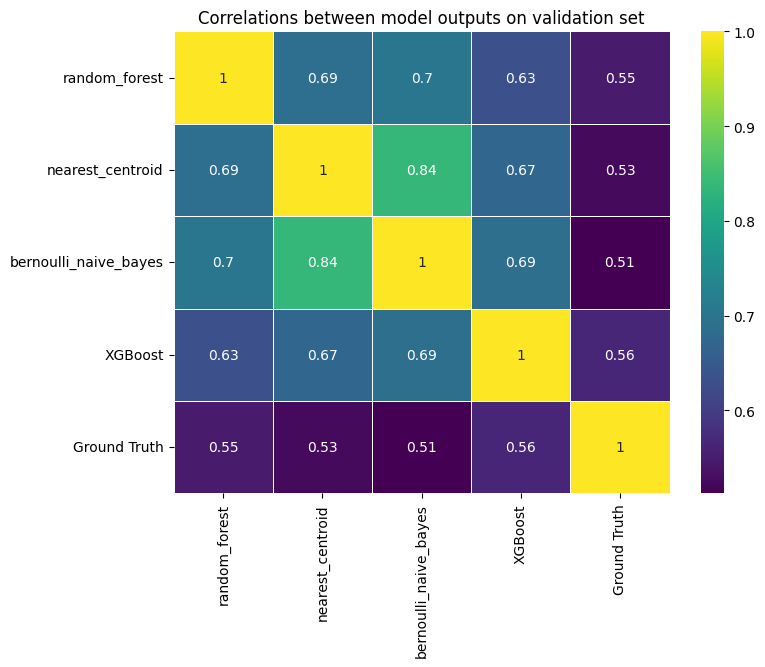

In [103]:
val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)
val_preds_df['Ground Truth'] = y_valid

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(val_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on validation set")
plt.show()

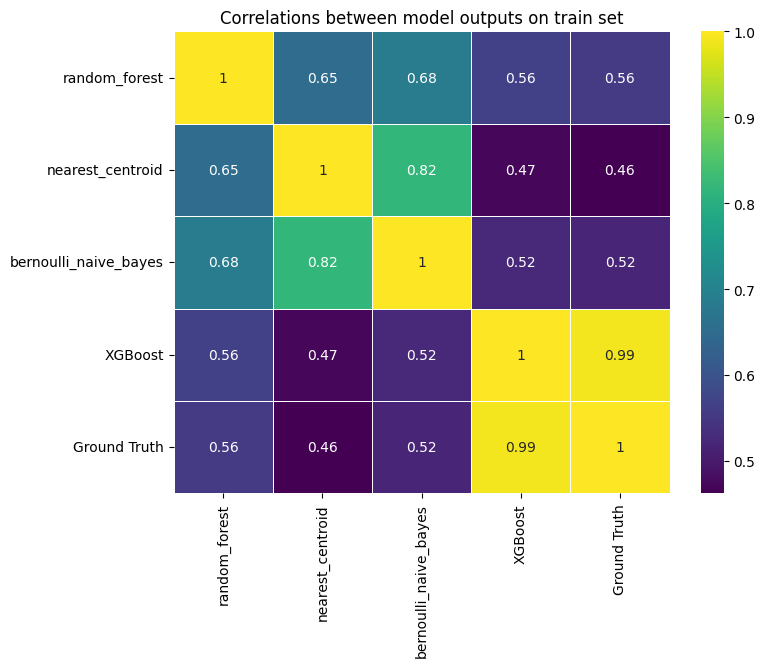

In [104]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)
train_preds_df['Ground Truth'] = y_train

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(train_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on train set")
plt.show()

### Voting Classifier

In [105]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=[3, 2, 1, 1])
voting_classifier.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


Train F1 Score: 0.7773279352226721
Valid F1 Score: 0.7327935222672065


### Stacking Classifier

In [106]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other th

Train F1 Score: 0.7773279352226721
Valid F1 Score: 0.7327935222672065


### Custom Ensemble using Decision Tree & Some inputs columns

In [107]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)

val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)

test_preds_df = pd.DataFrame()
for name, model in estimators:
    test_preds_df[name] = model.predict(X_test)

train_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/train_processed.csv")
valid_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/valid_processed.csv")
test_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/test_processed.csv")

FEATURE_NAMES_TO_ADD = ['total_protein', 'nasogastric_reflux_ph', 'packed_cell_volume', 'abdomo_protein', 'respiratory_rate', 'pain_is_extreme_pain']
for feature in FEATURE_NAMES_TO_ADD:
    train_preds_df[feature] = train_df[feature]
    val_preds_df[feature] = valid_df[feature]
    test_preds_df[feature] = test_df[feature]

X_train_with_preds = train_preds_df.to_numpy()
X_valid_with_preds = val_preds_df.to_numpy()
X_test_with_preds = test_preds_df.to_numpy()

print(f"X_train_with_preds shape: {X_train_with_preds.shape}\nX_valid_with_preds shape: {X_valid_with_preds.shape}\nX_test_with_preds shape: {X_test_with_preds.shape}")

X_train_with_preds shape: (988, 10)
X_valid_with_preds shape: (247, 10)
X_test_with_preds shape: (824, 10)


In [112]:
from sklearn.tree import DecisionTreeClassifier

final_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3, splitter='best')
final_classifier.fit(X_train_with_preds, y_train)

train_preds = final_classifier.predict(X_train_with_preds)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = final_classifier.predict(X_valid_with_preds)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.9959514170040485
Valid F1 Score: 0.7327935222672065


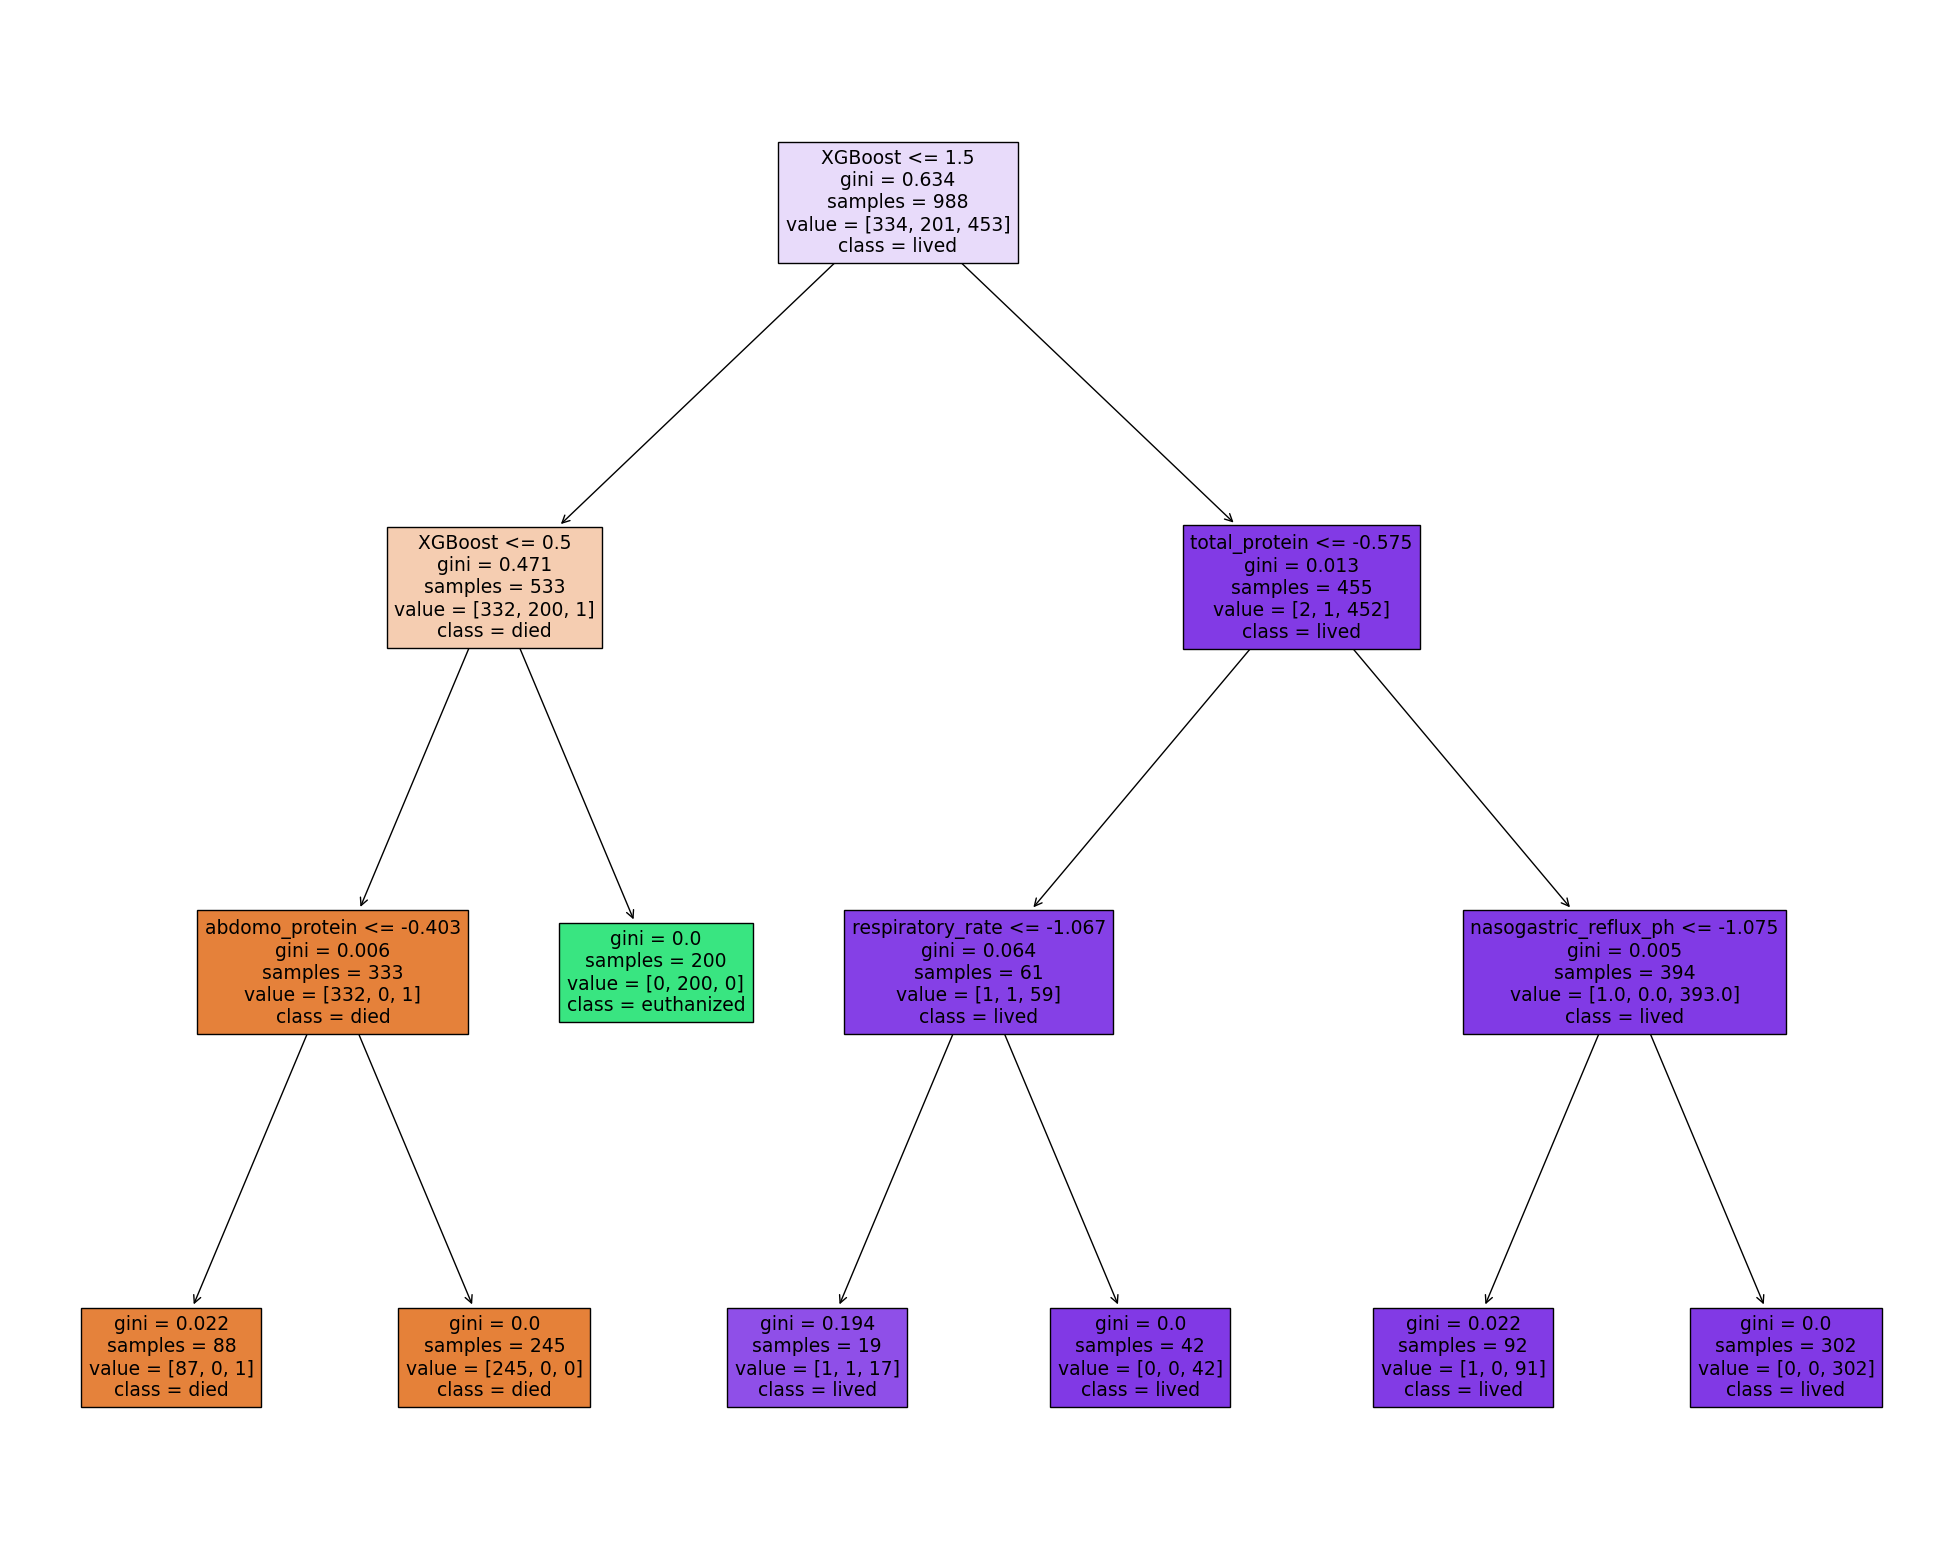

In [113]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_classifier, 
                   feature_names=list(train_preds_df.columns),  
                   class_names=['died', 'euthanized', 'lived'],
                   filled=True)

In [116]:
# Define your XGBoost model
final_classifier = xgb.XGBClassifier(
    random_state=0,
    max_depth=3,
    objective='multi:softmax',  # Use 'binary:logistic' for binary classification
    num_class=3  # Specify the number of classes for multi-class classification
)

# Train the XGBoost model using the predictions and additional features
final_classifier.fit(X_train_with_preds, y_train)

# Make predictions on training and validation data
train_preds = final_classifier.predict(X_train_with_preds)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')

valid_preds = final_classifier.predict(X_valid_with_preds)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.9979757085020243
Valid F1 Score: 0.7327935222672065


In [ ]:
test_preds = final_classifier.predict(X_test_with_preds)

In [ ]:
PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

In [ ]:
# submission_df.to_csv("submissions/Without_Ordinal_Encoding/DecisionTree_Ensemble_3_RandomForest_5_4_NearestCentroid_NaiveBayes_XGBoost_Submission.csv", index=False)